In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
# Cryptarchia lottery function

def phi(f, alpha):
    return 1 - (1-f)**alpha

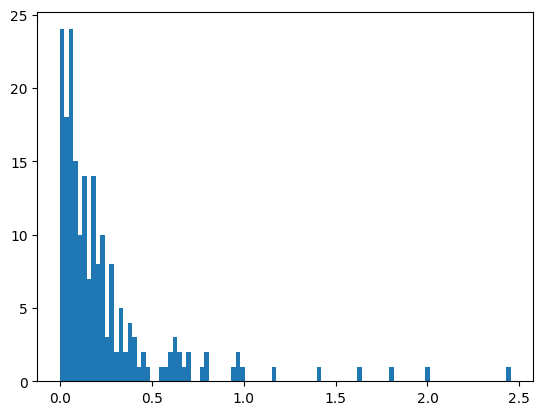

In [3]:
# Generate stake distribution
total_notes = 200

stake = np.random.pareto(5, total_notes)
_ = plt.hist(stake, bins=100)

In [4]:
# True Total Stake
true_stake = np.array(stake).sum()
true_stake

np.float64(49.31998548375692)

In [5]:
f = 1/30 # occupancy rate
T = int(10 * 2160 / f) # epoch length, 10k/f

In [ ]:
epochs = 30
shock_size = [5, 10, 25, 50]
sims = 100
beta = 0.8

D_values = []
D_values_hi = []

def run_simulation(D_init, stake, sims, epochs, T):
    results = []
    for k in range(sims):
        D_ell = D_init
        D_sim = np.empty(epochs)
        
        for i in range(epochs):
            D_sim[i] = D_ell

            alpha = stake / D_ell
            p_lottery = phi(f, alpha)
            wins = np.random.uniform(0, 1, (T, len(stake))) < p_lottery

            empirical_slot_activation_rate = np.count_nonzero(np.sum(wins, axis=1)) / T
            error = f - empirical_slot_activation_rate

            h = beta * (D_ell / f)
            D_ell = D_ell - h * error

        results.append(D_sim)
    
    return results

for shock in shock_size:

    # Low shock run
    D_init_low = true_stake - (true_stake * shock / 100)
    D_values.append(run_simulation(D_init_low, stake, sims, epochs, T))
    print(f"Low shock {shock}% done.")

    # High shock run
    D_init_hi = true_stake + (true_stake * shock / 100)
    D_values_hi.append(run_simulation(D_init_hi, stake, sims, epochs, T))
    print(f"High shock {shock}% done.")


In [ ]:
# plot convergence for lower estimates
for j in range(0, len(shock_size)):
    for k in range(0, sims):
        plt.plot(range(0, epochs), D_values[j][k])
        plt.plot(range(0, epochs), np.full_like(range(0, epochs), true_stake, dtype=float))
        plt.xlabel("Epoch")
        plt.ylabel("Stake")
        plt.title(f"Stake estimate convergence after a {shock_size[j]}% shock (increase)")
    plt.show()

In [ ]:
# plot convergence for higher estimates
for j in range(0, len(shock_size)):
    for k in range(0, sims):
        plt.plot(range(0, epochs), D_values[j][k])
        plt.plot(range(0, epochs), np.full_like(range(0, epochs), true_stake, dtype=float))
        plt.xlabel("Epoch")
        plt.ylabel("Stake")
        plt.title(f"Stake estimate convergence after a {shock_size[j]}% shock (decrease)")
    plt.show()

In [ ]:
# plot error for lower estimates
for j in range(0, len(shock_size)):
    for k in range(0, sims):
        plt.plot(range(0, epochs), np.abs((D_values[j][k] - true_stake) / true_stake))
        plt.xlabel("Epoch")
        plt.ylabel("Normalised error")
        plt.title(f"Normalised error after a {shock_size[j]}% shock (increase)")
    plt.show()

In [ ]:
# plot error for higher estimates
for j in range(0, len(shock_size)):
    for k in range(0, sims):
        plt.plot(range(0, epochs), np.abs((D_values_hi[j][k] - true_stake) / true_stake))
        plt.xlabel("Epoch")
        plt.ylabel("Normalised error")
        plt.title(f"Normalised error after a {shock_size[j]}% shock (decrease)")
    plt.show()